#**Caça ao Tesouro**

### **Trabalho 1**
Neste trabalho, o(a) aluno(a) deve implementar três algoritmos de busca (Busca de Custo Uniforme, Busca Gulosa e A*) para resolver um problema de caça ao tesouro em um grid. O objetivo é encontrar o caminho mais curto ou mais eficiente para coletar o tesouro que se encontra no grid.

#### **Configuração do Problema**
1. **grid de matriz**: O ambiente é representado como uma matriz, onde cada célula pode ser:
   - Uma **célula vazia** (o robô pode passar por ela e o custo é 1),
   - Um **obstáculo** (o robô não pode passar por ela),
   - Uma **lama** (o custo para passar por essa célula é 5),
   - Um **tesouro** (o robô pode coletar ao alcançar essa célula).
   
2. **Posição Inicial**: A posição inicial sera passada como parametro.
3. **Posição do Tesouro**: A posição do tesouro sera passada como parametro.
4. **Movimentos possiveis**: O nosso agente pode se movimentar 1 célula por vez e somente nas direções cima, baixo, esquerda ou direita.

#### **Exemplo de grid**
- `I` = Posição Inicial
- `T` = Tesouro
- `#` = Obstáculo
- `L` = Lama
- `.` = Célula Vazia

Exemplo de grid:

```
I # . # L L T
. # . # L # .
. # . # L # .
. # . . . # .
. # . # . # .
. # . # . # .
. . . # . . .
```

### **Implementação dos Algoritmos**
1. **Busca de Custo Uniforme (UCS)**
   - Implemente a Busca de Custo Uniforme para encontrar o caminho mais curto da posição inicial até um tesouro.

2. **Busca Gulosa**
   - Implemente uma busca gulosa para encontrar um caminho ao tesouro.
   - A heurística deve ser a [distância Manhattan](https://pt.wikipedia.org/wiki/Geometria_do_t%C3%A1xi) entre a posição atual e a posição do tesouro.
  
3. **Busca A\***
   - Implemente o algoritmo de busca A* para coletar todo o tesouro.
   - A heurística deve ser também a [distância Manhattan](https://pt.wikipedia.org/wiki/Geometria_do_t%C3%A1xi).


### **Retorno das Funções**

Cada função de busca deverá retornar um array contendo as posições que representam o caminho percorrido até o tesouro. Esse array deve listar, em ordem, todas as coordenadas visitadas pelo algoritmo, desde a posição inicial até a posição do tesouro final. As coordenadas devem ser organizadas no formato `(linha, coluna)`, facilitando a visualização do percurso realizado pelo robô no grid.

Caso não exista um caminho possível até o tesouro, a função deve retornar um array vazio `[]`.

**Exemplo de Retorno:**
```python
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (0, 4), (0, 5), (0, 6)]
```


#### **Desafio: Múltiplos Tesouros**
   - Altere as funções da Busca Gulosa e Busca A* para receber como parâmetro um array com a posição de vários tesouros, e calcule uma rota para coletar todos.


### **Entrega**
A entrega deverá ser realizada pela plataforma **Aprender3**. O aluno deve submeter para correção a função principal de busca e todas as funções auxiliares correspondentes ao algoritmo de busca em avaliação.

In [ ]:
#@title Funções geradores de imagem
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from collections import defaultdict

def print_mapa(grid, caminho=[], title=""):
    """
    Esta função gera uma representação visual do mapa usando matplotlib.
    """
    cores = [
        "#9c5a3c",  # Nada
        "#3d1e10",  # Obstaculo
        "#FFCA00",  # Tesouro
        "#EBCF87",  # Caminho
        "#EBAD87"   # Lama
    ]

    grid_cores = {
        '.': 0,  # Vazio
        '#': 1,  # Obstaculo
        'I': 0,  # Inicio
        'T': 2,  # Tesouro
        '*': 3,  # Caminho
        'L': 4   # Lama
    }

    # cria um colormap personalizado
    cmap = ListedColormap(cores)

    n, m = len(grid), len(grid[0])
    map_visual = np.zeros((n, m))

    # Conte quantas vezes cada célula é visitada no caminho
    path_indices = defaultdict(list)

    for idx, pos in enumerate(caminho):
        path_indices[pos].append(idx)


    for i in range(n):
        for j in range(m):
            # Altera as cores das celulas que estao no caminho
            if (i, j) in caminho:
                if grid[i][j] == 'I':
                    map_visual[i][j] = grid_cores['*']
                elif grid[i][j] == 'T':
                    map_visual[i][j] = grid_cores['*']
                elif grid[i][j] == '.':
                    map_visual[i][j] = grid_cores['*']
                elif grid[i][j] == 'L':
                    map_visual[i][j] = grid_cores['*']
                else:
                    map_visual[i][j] = grid_cores[grid[i][j]]
            else:
                map_visual[i][j] = grid_cores.get(grid[i][j], 0)

    if title:
        plt.title(title)
    # Plota o mapa
    plt.imshow(map_visual, cmap=cmap, vmin=0, vmax=len(cores) - 1)

    # Adicionar anotações de texto a cada célula
    for i in range(n):
        for j in range(m):
            # Exibir o indice do caminho no canto inferior direito se a celula estiver no caminho
            if (i, j) in path_indices:
                index = ", ".join(map(str, path_indices[(i, j)]))
                plt.text(j + 0.35, i + 0.35, index, ha='right', va='bottom', color='red', fontsize=4)
                plt.text(j, i, grid[i][j], ha='center', va='center', color='black', fontsize=12, fontweight='bold')
            else:
               plt.text(j, i, grid[i][j], ha='center', va='center', color='white', fontsize=12, fontweight='bold')



    plt.grid(which='both', color='black', linestyle='-', linewidth=2)
    plt.xticks(np.arange(-0.5, m, 1), [])
    plt.yticks(np.arange(-0.5, n, 1), [])

    # Mostra o mapa
    plt.show()

def print_caminho(grid, caminho, title=""):
    """
    Esta função recebe uma matriz e um caminho como argumentos e mostra o caminho percorrido na matriz.
    """
    # Cria uma copia da grade para evitar modificar a original
    grid_copia = [linha[:] for linha in grid]

    # Marque o caminho com '*'
    for (x, y) in caminho:
        if grid_copia[x][y] == '.':  # Marca apenas celulas vazias
            grid_copia[x][y] = '*'

    print_mapa(grid_copia, caminho, title)

Para facilitar a visualização do problema, duas funções auxiliares estão disponíveis: print_mapa e print_caminho. Abaixo, veja exemplos de uso dessas funções.

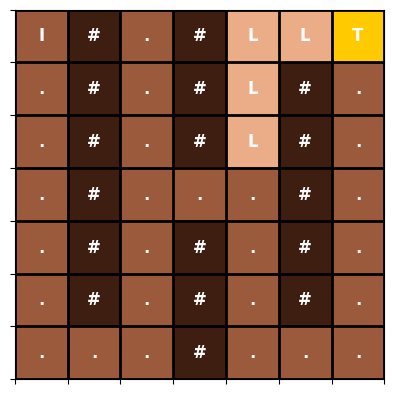

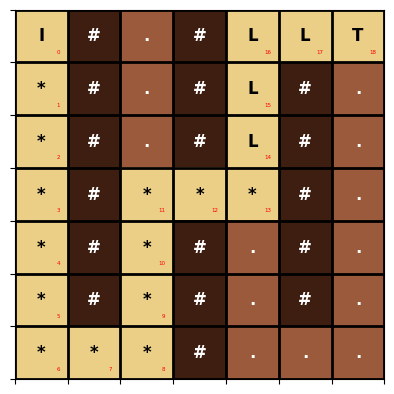

In [26]:
mapa = [
    ['I', '#', '.', '#', 'L', 'L', 'T'],
    ['.', '#', '.', '#', 'L', '#', '.'],
    ['.', '#', '.', '#', 'L', '#', '.'],
    ['.', '#', '.', '.', '.', '#', '.'],
    ['.', '#', '.', '#', '.', '#', '.'],
    ['.', '#', '.', '#', '.', '#', '.'],
    ['.', '.', '.', '#', '.', '.', '.'],
]

caminho = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (0, 4), (0, 5), (0, 6)]

# Mostra o mapa inicial
print_mapa(mapa)

# Mostra a grid com o caminho
print_caminho(mapa, caminho)

In [ ]:
import heapq

def busca_custo_uniforme(grid, pos_inicial, pos_tesouro):
    linhas, colunas = len(grid), len(grid[0])
    movimentos = [(-1,0), (1,0), (0,-1), (0,1)]   
    fila = [(0, pos_inicial, [pos_inicial])]
    visitados = set()

    while fila:
        custo, pos, caminho = heapq.heappop(fila)
        if pos in visitados:
            continue
        visitados.add(pos)
        if pos == pos_tesouro:
            return caminho
        for dx, dy in movimentos:
            nx, ny = pos[0] + dx, pos[1] + dy
            if 0 <= nx < linhas and 0 <= ny < colunas:
                celula = grid[nx][ny]
                if celula != "#":
                    novo_custo = custo + (5 if celula == "L" else 1)
                    heapq.heappush(fila, (novo_custo, (nx, ny), caminho + [(nx, ny)]))
    return []


In [ ]:
import heapq

def busca_gulosa(grid, pos_inicial, pos_tesouro):
    linhas, colunas = len(grid), len(grid[0])
    movimentos = [(-1,0), (1,0), (0,-1), (0,1)]

    def heuristica(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    fila = [(heuristica(pos_inicial, pos_tesouro), pos_inicial, [pos_inicial])]
    visitados = set()

    while fila:
        heuris, pos, caminho = heapq.heappop(fila)
        if pos in visitados:
            continue
        visitados.add(pos)
        if pos == pos_tesouro:
            return caminho
        for dx, dy in movimentos:
            nx, ny = pos[0] + dx, pos[1] + dy
            if 0 <= nx < linhas and 0 <= ny < colunas:
                celula = grid[nx][ny]
                if celula != "#":
                    heapq.heappush(fila, (heuristica((nx, ny), pos_tesouro), (nx, ny), caminho + [(nx, ny)]))
    return []



In [ ]:
import heapq

def busca_gulosa_multiplos(grid, pos_inicial, pos_tesouro):
    caminho_total = []
    pos_atual = pos_inicial
    pos_tesouro_restantes = pos_tesouro.copy()

    def heuristica(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    while pos_tesouro_restantes:
        alvo = min(pos_tesouro_restantes, key=lambda t: heuristica(pos_atual, t))
        linhas, colunas = len(grid), len(grid[0])
        movimentos = [(-1,0), (1,0), (0,-1), (0,1)]
        fila = [(heuristica(pos_atual, alvo), pos_atual, [pos_atual])]
        visitados = set()
        caminho_ate_tesouro = []
        while fila:
            heuris, pos, caminho = heapq.heappop(fila)
            if pos in visitados:
                continue
            visitados.add(pos)
            if pos == alvo:
                caminho_ate_tesouro = caminho
                break
            for dx, dy in movimentos:
                nx, ny = pos[0] + dx, pos[1] + dy
                if 0 <= nx < linhas and 0 <= ny < colunas:
                    celula = grid[nx][ny]
                    if celula != "#":
                        heapq.heappush(fila, (heuristica((nx, ny), alvo), (nx, ny), caminho + [(nx, ny)]))
        if not caminho_ate_tesouro:
            break
        if caminho_total:
            caminho_total += caminho_ate_tesouro[1:]
        else:
            caminho_total = caminho_ate_tesouro[:]
        pos_atual = alvo
        pos_tesouro_restantes.remove(alvo)
    return caminho_total



In [ ]:
import heapq

def busca_a_estrela(grid, pos_inicial, pos_tesouro):
    linhas, colunas = len(grid), len(grid[0])
    movimentos = [(-1,0), (1,0), (0,-1), (0,1)]

    def heuristica(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    fila = [(0 + heuristica(pos_inicial, pos_tesouro), 0, pos_inicial, [pos_inicial])]
    visitados = set()

    while fila:
        heuris, custo, pos, caminho = heapq.heappop(fila)
        if pos in visitados:
            continue
        visitados.add(pos)
        if pos == pos_tesouro:
            return caminho
        for dx, dy in movimentos:
            nx, ny = pos[0] + dx, pos[1] + dy
            if 0 <= nx < linhas and 0 <= ny < colunas:
                celula = grid[nx][ny]
                if celula != "#":
                    novo_custo = custo + (5 if celula == "L" else 1)
                    prioridade = novo_custo + heuristica((nx, ny), pos_tesouro)
                    heapq.heappush(fila, (prioridade, novo_custo, (nx, ny), caminho + [(nx, ny)]))
    return []


In [ ]:
import heapq

def busca_a_estrela_multiplos(grid, pos_inicial, pos_tesouro):
    caminho_total = []
    pos_atual = pos_inicial
    pos_tesouro_restantes = pos_tesouro.copy()

    def heuristica(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    while pos_tesouro_restantes:
        alvo = min(pos_tesouro_restantes, key=lambda t: heuristica(pos_atual, t))
        linhas, colunas = len(grid), len(grid[0])
        movimentos = [(-1,0), (1,0), (0,-1), (0,1)]
        fila = [(heuristica(pos_atual, alvo), 0, pos_atual, [pos_atual])]
        visitados = set()
        caminho_ate_tesouro = []
        while fila:
            heuris, custo, pos, caminho = heapq.heappop(fila)
            if pos in visitados:
                continue
            visitados.add(pos)
            if pos == alvo:
                caminho_ate_tesouro = caminho
                break
            for dx, dy in movimentos:
                nx, ny = pos[0] + dx, pos[1] + dy
                if 0 <= nx < linhas and 0 <= ny < colunas:
                    celula = grid[nx][ny]
                    if celula != "#":
                        novo_custo = custo + (5 if celula == "L" else 1)
                        prioridade = novo_custo + heuristica((nx, ny), alvo)
                        heapq.heappush(fila, (prioridade, novo_custo, (nx, ny), caminho + [(nx, ny)]))
        if not caminho_ate_tesouro:
            break
        if caminho_total:
            caminho_total += caminho_ate_tesouro[1:]
        else:
            caminho_total = caminho_ate_tesouro[:]
        pos_atual = alvo
        pos_tesouro_restantes.remove(alvo)
    return caminho_total

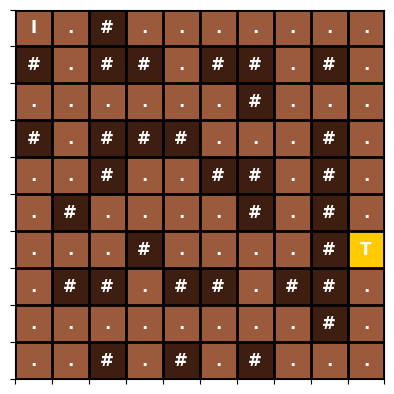

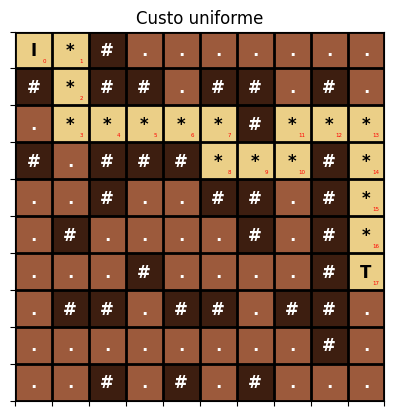

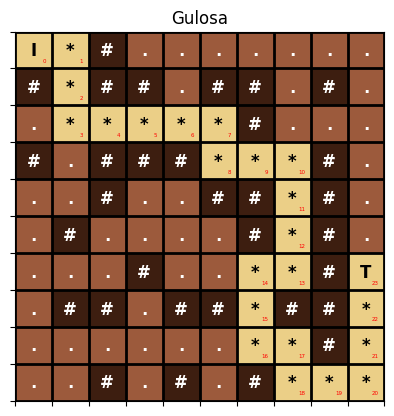

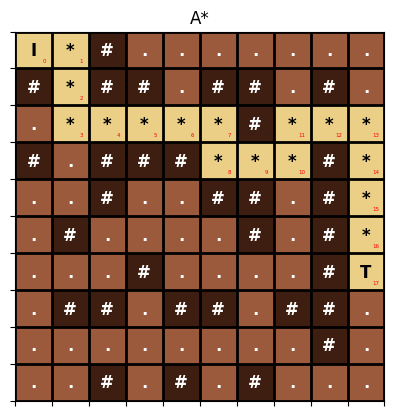

Multiplos:


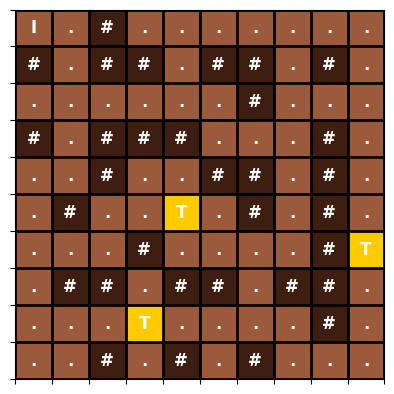

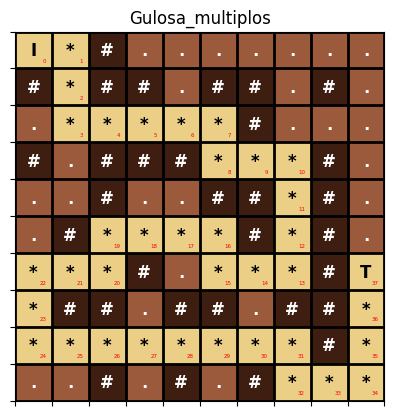

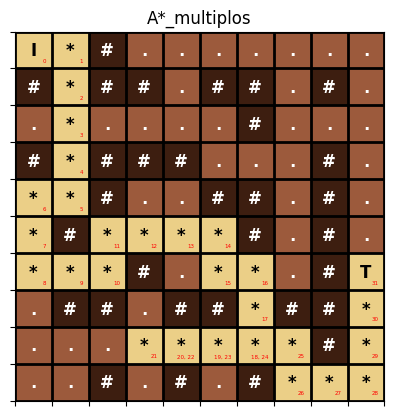

In [30]:
grid = [
    ['I', '.', '#', '.', '.', '.', '.', '.', '.', '.'],
    ['#', '.', '#', '#', '.', '#', '#', '.', '#', '.'],
    ['.', '.', '.', '.', '.', '.', '#', '.', '.', '.'],
    ['#', '.', '#', '#', '#', '.', '.', '.', '#', '.'],
    ['.', '.', '#', '.', '.', '#', '#', '.', '#', '.'],
    ['.', '#', '.', '.', '.', '.', '#', '.', '#', '.'],
    ['.', '.', '.', '#', '.', '.', '.', '.', '#', 'T'],
    ['.', '#', '#', '.', '#', '#', '.', '#', '#', '.'],
    ['.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
    ['.', '.', '#', '.', '#', '.', '#', '.', '.', '.'],
]
pos_inicial = (0, 0)
pos_tesouro = (6, 9)

caminho_bcu = busca_custo_uniforme(grid, pos_inicial, pos_tesouro)
caminho_gulosa = busca_gulosa(grid, pos_inicial, pos_tesouro)
caminho_a_estrela = busca_a_estrela(grid, pos_inicial, pos_tesouro)

# caminho_bcu = [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)]
# caminho_gulosa = [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (6, 7), (6, 6), (7, 6), (8, 6), (8, 7), (9, 7), (9, 8), (9, 9), (8, 9), (7, 9), (6, 9)]
# caminho_a_estrela = [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)]

print_mapa(grid)
print_caminho(grid, caminho_bcu, "Custo uniforme")
print_caminho(grid, caminho_gulosa, "Gulosa")
print_caminho(grid, caminho_a_estrela, "A*")

print("Multiplos:")

grid_multiplos = [
    ['I', '.', '#', '.', '.', '.', '.', '.', '.', '.'],
    ['#', '.', '#', '#', '.', '#', '#', '.', '#', '.'],
    ['.', '.', '.', '.', '.', '.', '#', '.', '.', '.'],
    ['#', '.', '#', '#', '#', '.', '.', '.', '#', '.'],
    ['.', '.', '#', '.', '.', '#', '#', '.', '#', '.'],
    ['.', '#', '.', '.', 'T', '.', '#', '.', '#', '.'],
    ['.', '.', '.', '#', '.', '.', '.', '.', '#', 'T'],
    ['.', '#', '#', '.', '#', '#', '.', '#', '#', '.'],
    ['.', '.', '.', 'T', '.', '.', '.', '.', '#', '.'],
    ['.', '.', '#', '.', '#', '.', '#', '.', '.', '.'],
]
pos_inicial = (0, 0)
pos_tesouro_multiplos = [(6, 9), (5, 4), (8, 3)]

caminho_gulosa_multiplos = busca_gulosa_multiplos(grid_multiplos, pos_inicial, pos_tesouro_multiplos)
caminho_a_estrela_multiplos = busca_a_estrela_multiplos(grid_multiplos, pos_inicial, pos_tesouro_multiplos)

print_mapa(grid_multiplos)
print_caminho(grid, caminho_gulosa_multiplos, "Gulosa_multiplos")
print_caminho(grid, caminho_a_estrela_multiplos, "A*_multiplos")

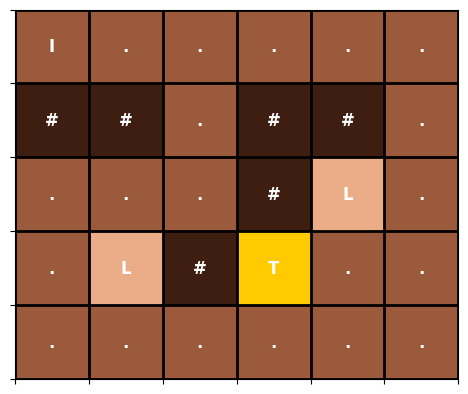

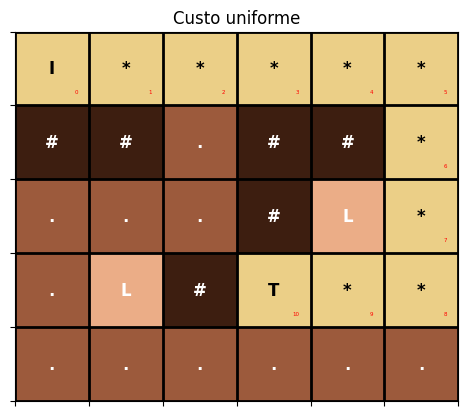

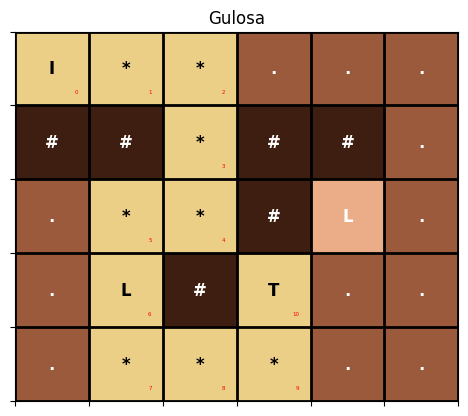

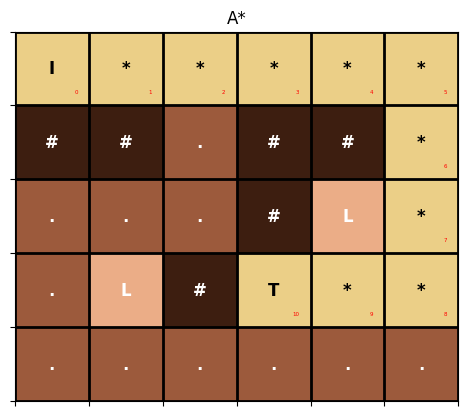

In [31]:
grid = [
    ['I', '.', '.', '.', '.', '.'],
    ['#', '#', '.', '#', '#', '.'],
    ['.', '.', '.', '#', 'L', '.'],
    ['.', 'L', '#', 'T', '.', '.'],
    ['.', '.', '.', '.', '.', '.']
]
pos_inicial = (0, 0)
pos_tesouro = (3, 3)

print_mapa(grid)

caminho_bcu = busca_custo_uniforme(grid, pos_inicial, pos_tesouro)
caminho_gulosa = busca_gulosa(grid, pos_inicial, pos_tesouro)
caminho_a_estrela = busca_a_estrela(grid, pos_inicial, pos_tesouro)

# caminho_bcu = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (3, 4), (3, 3)]
# caminho_gulosa = [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (3, 3)]
# caminho_a_estrela = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (3, 4), (3, 3)]

print_caminho(grid, caminho_bcu, "Custo uniforme")
print_caminho(grid, caminho_gulosa, "Gulosa")
print_caminho(grid, caminho_a_estrela, "A*")


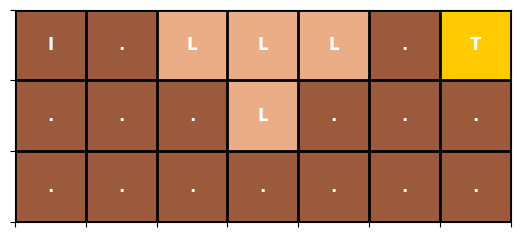

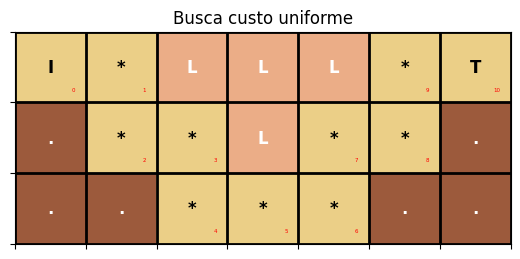

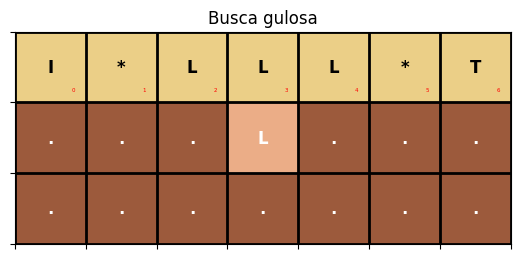

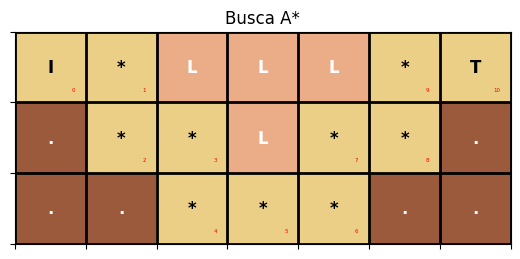

In [32]:

grid = [
    ['I', '.', 'L', 'L', 'L', '.', 'T'],
    ['.', '.', '.', 'L', '.', '.', '.'],
    ['.', '.', '.', '.', '.', '.', '.'],
]
pos_inicial = (0, 0)
tesouro = (0, 6)

print_mapa(grid)

caminho_bcu = busca_custo_uniforme(grid, pos_inicial, tesouro)
caminho_gulosa = busca_gulosa(grid, pos_inicial, tesouro)
caminho_a_estrela = busca_a_estrela(grid, pos_inicial, tesouro)

# caminho_bcu = [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (1, 4), (1, 5), (0, 5), (0, 6)]
# caminho_gulosa = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]
# caminho_a_estrela = [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (1, 4), (1, 5), (0, 5), (0, 6)]

print_caminho(grid, caminho_bcu, "Busca custo uniforme")
print_caminho(grid, caminho_gulosa, "Busca gulosa")
print_caminho(grid, caminho_a_estrela, "Busca A*")